Task-6A: Please explain the k-means algorithm with referring to the technical details including Expectation-Maximization. Please also underline the advantages and disadvantages of the k-means algorithm. Please also mention how we decide on the most suitable cluster number. 

K-Means algoritması bir denetimsiz öğrenme (gözetimsiz öğrenme) ve kümeleme algoritmasıdır. Labellar dan çünkü datanın ne olmamış habersiz olan bizler clustering yani kümeleme ile datayı gruplandırmaya çalışacağız.

amaç : Gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. Oluşturulan kümelerin kendi içinde homojen, birbirlerine göre ise heterojen olması beklenmektedir. 

Kümeleme yöntemleri hiyerarşik ve hiyerarşik olmayan kümeleme yöntemleri olarak ikiye ayrılır. bu açıdan değerlendirdiğimizde  k-means hiyerarşik olmayan bir kümeleme yöntemidir. Bu iki yaklaşımda da temel amacımız kümeler içi benzerliği yüksek, kümeler arası ise düşük yapmaya çalışmaktır. unsupervised metod. Özlellike segmentasyon problemlerinde kullanabiliriz.

K-means metodunu uygularken 6 adımdan bahsedebiliriz

- küme sayısı belirlenir.
- Rastgele k merkez seçilir.
- Her gözlem için k merkezlere uzaklıklar hesaplanır ve gözlemler kendisine en yakın k merkezine atanır.
- Her gözlem en yakın olduğu merkeze yani kümeye atanır.
- Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır.
- Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının (total within cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

Yukarıdaki adımlardan da anlaşılacağı gibi Expectation- Maximization yaklaşımını kullanarak çalışan bir algoritmadır. her gözlem için en yakın olduğu kümeye atama yapıyor. Atama işleminden sonra tekrar kümeler için merkez hesaplamaları yapıyor. Bu şekilde yakınlaşana kadar devam ediyor. Expectation adımı ile gözlemler en yakın küme merkezine atanır. Maximization adımı da her küme merkezlerinin konumunu tanımlayan uygunluk işlevlerini makimize etmeyi içerdiği için her kümedeki verilerin basit bir ortalamasını alarak , küme merkezlerini ortalamaya ayarlamaya çalışır.

Bu E ve M adımlarının her tekrar her zaman küme özelliklerinin daha iyi bir şekilde tahmin edilmesini sağlayacaktır.


Optimum küme sayısını bulmak için Elbow metodu kullanılabilir. Bu metod WCSS (with cluster sum of squares) modelin başarılı olabilmesi açısından en uygun küme sayısının tespitinde oldukça önemlidir. Kullanılan formül aşağıdaki gibidir: 

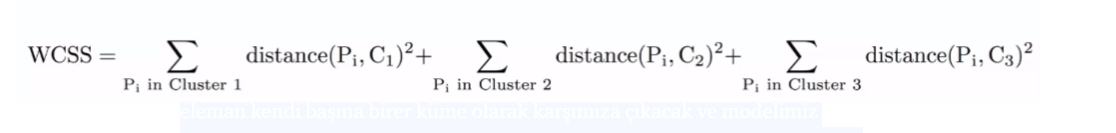

formül, her bir küme için o kümedeki noktaların merkez noktalarına olan uzaklıklarının karelerinin toplamını ifade etmektedir. en uygun küme sayısı, K-means algoritması ile oluşturulan modelin başarı kriteri olarak ödeğerlendirilir. Kısaca, küme elemanları arasındaki mesafeyi ne kadar minimum ve her bir küme arasndaki mesafeyi de ne kadar maksimum tutabiliyorsa o kadar başarılı bir kümeleme yapılmıştır. aslında küme sayısı arttıkça küme içindeki her bir eleman arası mesafe azalmış olacaktır. bununla beraber de WCSS değeri azalmış olacaktır. Fakat bu şekilde veri setindeki her elemanı modele dahil edersek, ovefitting ihtimali artacaktır. Çünkü model ezberleme durumuna geçecektir.

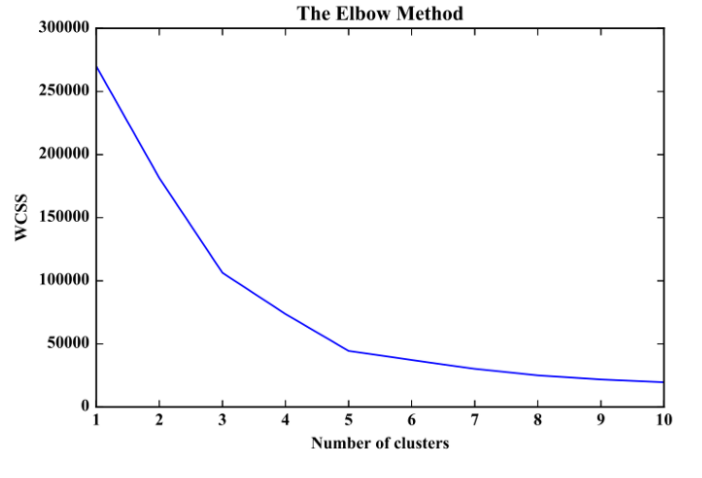

Örneğin bu yukarıdaki grafikte eğimin ani olarak değiştiği noktalardan biri k-point olarak alınabilir. 3 değeri gibi. Bu değer için, k-means algoritmasını kullanan model için optimum küme sayısı kabul edilebilir.

MiniBatch K-Means :

“MiniBatch K-Means” , “K-Means” e göre daha hızlı çalışır ve bazende küçük farklılıklar ile kümele yapabilir. daha küçük sample lar alarak bunlar üzerinde işlem yapar ve en uygun kümelemeyi yapmaya çalışır.

Pros:

- Uygulaması nispeten basit.

- Büyük veri kümelerine ölçeklenebilir

- Centroidlerin pozisyonlarını sıcak başlatabilir.

- Yeni örneklere kolayca uyum sağlayabilir.

- Eliptik kümeler gibi farklı şekil ve boyutlardaki kümeleri genelleştirir.

Cons:

- Modeldeki k (küme sayısı) bilgisi kullanıcıdan alındığı için belirtilen bu sayı her zaman optimum değer olmayabilir. 

- Başlangıçta rastgele olarak atanan merkez noktaları her zaman başarılı sayılabilecek  bir kümeleme işlemini başlatmayabilir. Çünkü algoritma başlangıçta rastgele olarak atanan bu merkez noktalarına göre şekillenmekte .

- k-means, kümelerin farklı boyutlarda ve yoğunlukta olduğu durumlarda verileri kümeleme konusunda sorun yaşar.

- Merkezler aykırı değerler tarafından sürüklenebilir veya aykırı değerler göz ardı edilmek yerine kümelere atanabilir. Kümelemeden önce aykırı değerleri kaldırmak oldukça önemli.

- Boyutların sayısı arttıkça, mesafeye dayalı benzerlik ölçüsü, verilen örnekler arasında sabit bir değere yakınsar. Bu nedenle featurelar üzeirnde PCa kullanarak ya da kumeleme algoritmasını Spectral Clustering kullanarak değiştirip boyut azaltması yapılmalıdır.


Task-6B: Please run the task of china.jpg with different cluster numbers (5 different values for k) via the k-means algorithm and discuss how the obtained findings change. Your explanation should be in detail and include how the compression factor changes with each cluster number. 

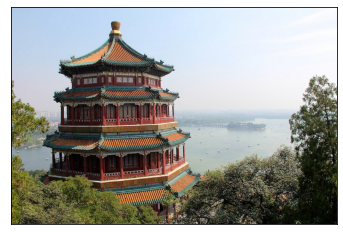

In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [3]:
china.shape

(427, 640, 3)

In [4]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [21]:
import warnings; warnings.simplefilter('ignore')  

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(6)
kmeans.fit(data)
new_colors_6 = kmeans.cluster_centers_[kmeans.predict(data)]

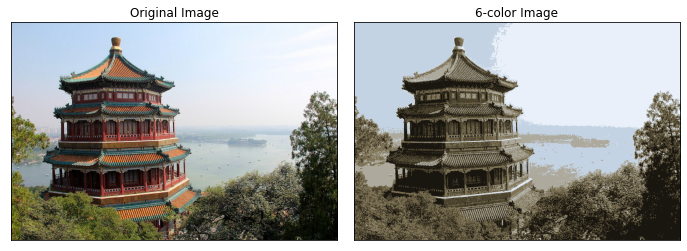

In [22]:
china_recolored = new_colors_6.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(china_recolored)
ax[1].set_title('6-color Image', size=12);

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(10)
kmeans.fit(data)
new_colors_10 = kmeans.cluster_centers_[kmeans.predict(data)]

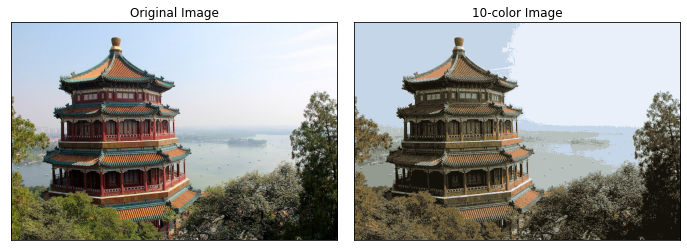

In [24]:
china_recolored = new_colors_10.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(china_recolored)
ax[1].set_title('10-color Image', size=12);

In [25]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors_16 = kmeans.cluster_centers_[kmeans.predict(data)]

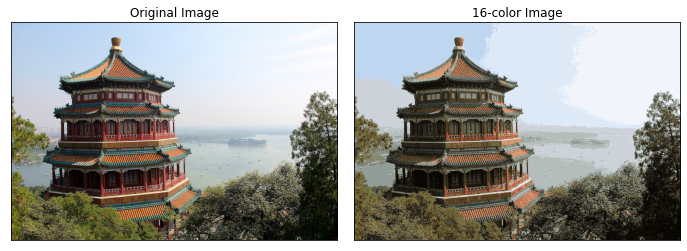

In [26]:
china_recolored = new_colors_16.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=12);

In [27]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(20)
kmeans.fit(data)
new_colors_20 = kmeans.cluster_centers_[kmeans.predict(data)]

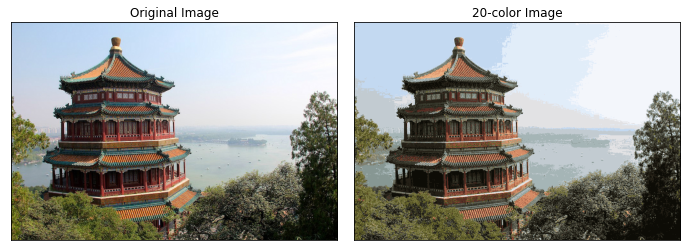

In [28]:
china_recolored = new_colors_20.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(china_recolored)
ax[1].set_title('20-color Image', size=12);

In [32]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(30)
kmeans.fit(data)
new_colors_30 = kmeans.cluster_centers_[kmeans.predict(data)]

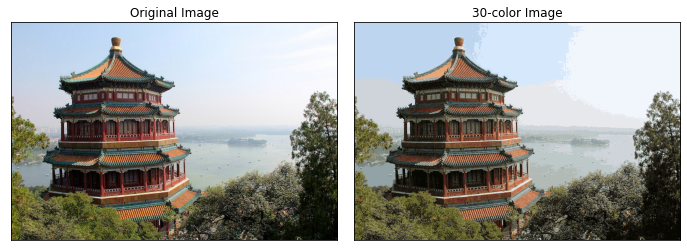

In [33]:
china_recolored = new_colors_30.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=12)
ax[1].imshow(china_recolored)
ax[1].set_title('30-color Image', size=12);

Task-6C: Please explain Gaussian Mixture Modeling as a comparison to the k-means clustering algorithm. Please provide sufficient technical details about how the GMM algorithm works as well as its positive and negative aspects.

GMM (Gaussian mixture models) popüler bir unsupervised öğrenme algoritmasıdır. GMM yaklaşımı, K-means kümeleme algoritmasına benzer ancak daha robust ve bu nedenle karmalşıklığından dolayı da daha kullanışlıdır.

kümelemede, etiketlenmemiş bir veri kümesi verildiğinde, örnekleri k kümeleri halinde gruplamaya çalışırız. GMM algoritmalarında ise veri kümesinin farklı alt populasyonlarının normal bir dağılım izlediği varsayılır ve yalnızca genel populasyonun olasılık dağılımı hakkında bilgi sahibi oluruz.

GMM, verileri oluşturmak için gaussian dağılımlarının bir karışımını varsayar. Veri noktalarının kümelerine yumuşak atama atamasıyla (yani olasılıklıve daha iyi), veri noktalarının kümelerine sert atamalarının K-ortalamalarıyla, merkezler kümelerinde bir veri varsayımı ile zıt olarak kullanılır

Kısacası, GMM yakalama daha iyi çalışır çünkü (A) yumuşak atamalar kullanarak farklı kümelere ait veri noktalarının belirsizliğini yakalar ve (B) dairesel kümeler için bir önyargıya sahip değildir. Dolayısıyla, doğrusal olmayan veri dağıtımlarında bile iyi çalışır. (In short, GMM capture works better because (A) it captures the uncertainty of data points belonging to different clusters by using soft-assignments, and (B) it doesn’t have a bias for circular clusters. So, it works well even with non-linear data distributions.)

Objective function of GMM is to maximize the likelihood value for the data X, p(X) or the log-likelihood value L(since log is a monotonically increasing function).

EM algoritması, parametrelerin doğrudan bulunamayacağı modellerin maksimum olasılık tahminlerini (MLE) bulmak için kullanılan yinelemeli bir algoritmadır. İki adımdan oluşur: beklenti adımı ve maksimizasyon adımı. (The EM algorithm is an iterative algorithm used to find maximum likelihood estimates(MLE) of models where parameters cannot be found directly . It consists of two steps: expectation step and the maximization step.)

Beklenti Adımı Üyelik değerlerini hesaplar. yani noktaların iligli kümelerine ait olma olasılıklarını hesaplar. Bu, x veri noktasının c kümesine ait olma olasılığıdır.

Maksimizasyon Adımı Farklı kümelere ait noktaların oranını belirleyen yeni bir parametre hesaplar. ve ayrıca her küme için MLE'leri hesaplayarak parametreleri günceller c.

GMM, verisetini ,normallik varsayımı altında, k-adet Gauss Dağılımının bir karışımı olarak açıklanan modeldir.

verilen ​örneklerin kaynaklarının k-adet Gauss dağılımı olduğunu varsayıp, bu kaynaklara ait Gauss parametrelerinin, karışımın olasılık yoğunluk işlevini maksimize edecek optimizasyonudur. Böylece, verisetinin tek dağılımdan üretildiğinin varsayılıp modelleme yapan algoritmaların çıkmaza girdiği yerlerde bile GMM başarılıdır


Gaussian Mixture Model yapılabilecek en kısa tabirle Gauss dağılımını baz alan bir Unsupervised(denetimsiz) kümeleme algoritmasıdır.
GMM’in en önemli özellikleri;
- Olasılık temelli yaklaşımı verisetindeki her örneğin tüm kümelere aidiyet olasılığını verir
- Çok kullanılan kümeleme algoritmaları gibi (örn: k-means) kümelemeyi dairesel yapmaz. Kümeler daha çok elipse yatkındır. 

Beklenti-Maksimizasyon (EM) Algoritması

Beklenti-Maksimizasyon (EM) algoritması, eksik gözlemler veya örneklemin bazı gizli değişkenleri olduğunda, parametreler için maksimum olabilirlik tahminlerini bulan yinelemeli bir algoritmadır. Yinelemeli bir algoritma olamsından dolayı aynı zamanda analitik bir çözüme ulaşılamayan sorunlarda kullanılabilmektedir.
Beklenti Maksimizasyon algortimasındaki amaç, P(X|ϴ) olasılığını ϴ’ya göre maksimize etmektir. (P(X|ϴ) == P(X1,X2|ϴ), X, bağımsız örnekler, X2 eksik gözlemler, ϴ ise [μ,Σ,ω] matrisidir). Formüle göre ϴ parametresi için yapılan yapılan çıkarsamalarla P(X|ϴ) maksimize edilir.

1- Beklenti adımı:

k-adet küme için gelişinden güzel ortalama ve varyanslarla, bilinmeyen veri ile ilgili en iyi olasılıklar tahmin edilir. tüm veri log olabilirliğinin log 𝑝𝜃(𝑋, 𝑌), gizli değişkenlerin koşullu olasılık yoğunluk fonksiyonuna göre( 𝑝𝜃𝑚−1 (𝑋|𝑌) ) beklentisi hesaplanır. Koşullu olasılık fonksiyonu parametrelerin son tahmini olan ve bir önceki iterasyonda hesaplanan 𝜃𝑚−1 parametre değerleri kullanılarak hesaplanır.

2- Maksimizasyon Adımı:

Tahmin edilen kayıp değer yerine konulup, veri üzerinden maksimum olabilirlik hesaplanarak parametrelerin yeni kestirimleri elde edilir. Verinin ve Gizli Değişkenin dağılımını en büyükleyecek şekilde parametrelerin güncellenmesi gerçeklenir.

Algoritma bir 𝜃m-1 değeri ile başlar, bu başlangıç değeri ya gelişinden güzel seçilir yada diğer kümeleme algoritmalarından yardım alınarak belirlenir. Bu adımlar belirli bir kriter sağlanana ya da maksimum iterasyon sayısına ulaşılana kadar ardışık olarak gerçekleştirilir

Genel olarak, K kümelerinde bölümlenmesi gereken n veri noktamız olduğunu varsayalım. Amaç, her veri noktasına bir küme atamaktır. K-ortalamalar, mesafe kaybı fonksiyonunu en aza indirerek veri noktalarından kümeye olan mesafeyi (örneğin Öklid mesafesi) en aza indiren kümelerin K konumlarını bulmayı amaçlayan bir kümeleme yöntemidir. K, veri noktaları için zor atama yapmak anlamına gelir, bu da bir noktanın tamamen bir kümeye ait olduğu veya hiç olmadığı anlamına gelir. (In general, suppose we have n data points, that have to be partitioned in K clusters. The goal is to assign a cluster to each data point. K-means is a clustering method that aims to find the K positions of the clusters that minimize the distance(for example Euclidian distance) from the data points to the cluster by minimizing distance loss function. K means do hard assignment for the data points that means a point either totally belongs to a cluster or not at all. )

- K-Means, bir tür mesafe fonksiyonu kullandığından ve küme merkezinden uzaklık ölçüldüğünden, kümeler yuvarlak şekilli olmadığında genellikle çalışmaz.
- K-Means kümelemesiyle ilgili bir diğer önemli sorun, Veri noktasının belirleyici olarak bir ve yalnızca bir kümeye atanmasıdır, ancak gerçekte küme arasında örtüşme olabilir

Bu sorunları gidermek için gauss karışım modeli tanıtıldı. Bu sorunların çoğunu ele alan olasılıklı bir kümelenme yaklaşımı. Bu yaklaşımda, her kümeyi ağırlık merkezi (ortalama), kovaryansı ve kümenin boyutuna (Ağırlık) göre tanımlıyoruz. (For address these problems gaussian mixture model was introduced. A probabilistic approach to clustering addressing many of these problems. In this approach we describe each cluster by its centroid (mean), covariance , and the size of the cluster(Weight).)

Burada kümeleri "en yakın" ağırlık merkezlerine göre tanımlamak yerine, verilere bir k gauss kümesi uyduruyoruz. Ve her bir küme için ortalama ve Varyans gibi gauss dağılım parametrelerini ve bir kümenin ağırlığını tahmin ediyoruz. Her veri noktası için parametreleri öğrendikten sonra, her bir kümeye ait olma olasılıklarını hesaplayabiliriz. (Here rather than identifying clusters by “nearest” centroids, we fit a set of k gaussians to the data. And we estimate gaussian distribution parameters such as mean and Variance for each cluster and weight of a cluster. After learning the parameters for each data point we can calculate the probabilities of it belonging to each of the clusters.)

Dolayısıyla matematiksel olarak, gauss karışım modelini K gauss dağılımının karışımı olarak tanımlayabiliriz, bu da bunun K gauss dağılımının ağırlıklı ortalaması olduğu anlamına gelir. (So mathematically we can define gaussian mixture model as mixture of K gaussian distribution that means it’s a weighted average of K gaussian distribution. )

PROS
- Soft clustering yapısına sahip
- Clustering: Captures non-spherical cluster distributions
- Density estimation: Captures multimodal distribution
- EM (expectation-maximization) algorithm for GMM always converges and often works well
- Yeni veri üretirken de rahatlıkla kullanılabilir
- k-means modelleyemediklerinde başarılı bir şekilde çalışır
- Dairesel ve küresel kümeleme yerine eliptik yaklaşımlara sahiptir.

CONS

- Requires defining number of clusters

- EM algorithm is dependent on initialization

Task-6D: Please run both k-means and GMM algorithms on the digits dataset with different parameters. Compare your findings in detail for both of these algorithms via different metrics like precision, recall, F1 score, and accuracy.

## KMeans

In [92]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

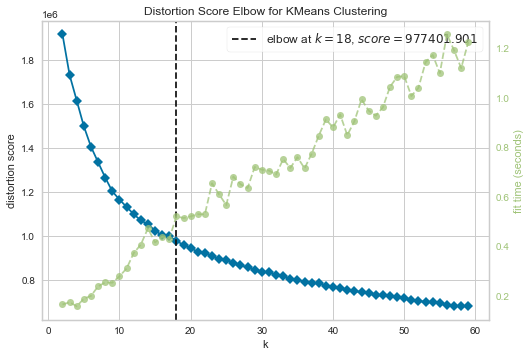

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,60))
visualizer.fit(X)
visualizer.poof()
#distortion score düşük olması bizim için iyi

In [110]:
inertia = []
for n in range(1 , 30):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

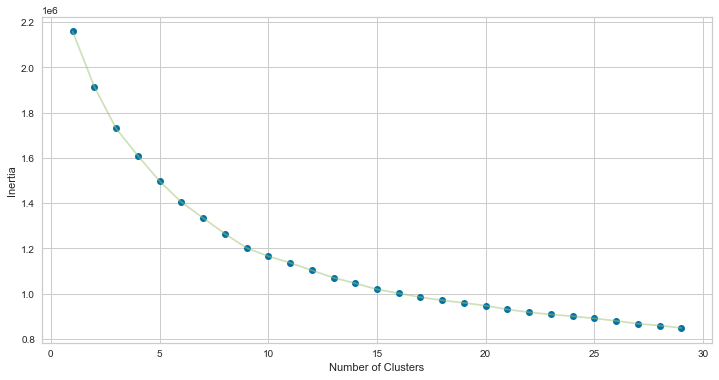

In [143]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 30) , inertia , 'o')
plt.plot(np.arange(1 , 30) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [136]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [137]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [141]:
labels

array([0, 8, 8, ..., 8, 9, 9])

In [142]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(digits.target, labels)
score = accuracy_score(y_true= digits.target, y_pred=labels)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.84      0.84      0.84       177
           3       0.86      0.85      0.85       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.59      0.51       174
           9       0.57      0.77      0.66       180

    accuracy                           0.80      1797
   macro avg       0.80      0.80      0.79      1797
weighted avg       0.81      0.80      0.79      1797

Accuracy Score :  79.52%


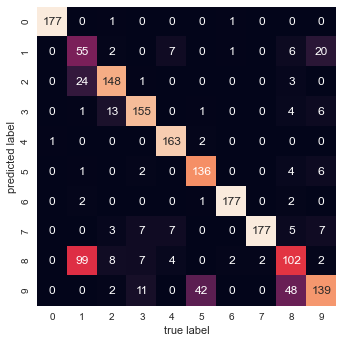

In [140]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

1 değeri için precision : 0.60 = 55/ 55+2+7+1+6+20  : 1 olarak tahmin edilen değerlerden gerçekten kaç tanesi 1

1 değeri için recall : 0.30  = 55/ 99+2+1+1+24+55    : 1 olan değerlerden model kaç tanesi doğru tahmin edebildi ?  %60 yakalayamamış. 

Accuracy değeri doğru tahmin edilen değerlerin toplam tahmin sayısına oranı :0.79=  177+55+148+155+163+136+177+177+102+139 / 1797

## GMM

In [186]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full', random_state=0).fit(digits.data)
clusters = gmm.predict(digits.data)

In [187]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(13):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [188]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(digits.target, labels)
score = accuracy_score(y_true= digits.target, y_pred=labels)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.63      0.31      0.42       182
           2       0.82      0.86      0.84       177
           3       0.00      0.00      0.00       183
           4       0.99      0.92      0.95       181
           5       0.97      0.91      0.94       182
           6       0.98      0.97      0.98       181
           7       0.85      1.00      0.92       179
           8       0.46      0.85      0.60       174
           9       0.47      0.76      0.58       180

    accuracy                           0.76      1797
   macro avg       0.72      0.76      0.72      1797
weighted avg       0.71      0.76      0.72      1797

Accuracy Score :  75.57%


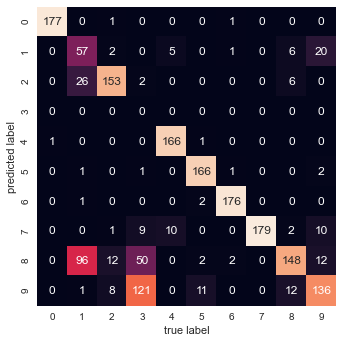

In [189]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Explained variance oranını 0.79 bulmak istediğimizde, model için gerekli olan component sayısı 13 olarak çıkmaktadır.

In [182]:
from sklearn.decomposition import PCA
pca = PCA(0.79, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 13)

PCA kullanarak gerekli component sayısını bulduğumuzda , modele girecek olan feature lar aynı değildir. PCA ile birlikte feature extraction yapılmıştır.

In [190]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=13, covariance_type='full', random_state=0).fit(digits.data)
clusters = gmm.predict(digits.data)

In [193]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(13):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [194]:
from sklearn.metrics import classification_report, accuracy_score
report = classification_report(digits.target, labels)
score = accuracy_score(y_true= digits.target, y_pred=labels)
print(report)
print("{} {:0.2f}%".format("Accuracy Score : ", score*100))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.78      0.84      0.81       182
           2       0.84      0.86      0.85       177
           3       0.59      0.37      0.45       183
           4       0.98      0.83      0.90       181
           5       0.94      0.97      0.95       182
           6       0.98      0.97      0.98       181
           7       0.80      1.00      0.89       179
           8       0.75      0.46      0.57       174
           9       0.38      0.58      0.46       180

    accuracy                           0.79      1797
   macro avg       0.80      0.79      0.79      1797
weighted avg       0.80      0.79      0.79      1797

Accuracy Score :  78.80%


n= 10 ile kurulan modelde,  cluster 3 için hiç değer tahmin edilememişti. 
n=13 ile kurulan modeli çıktısına baktığımızda 3 nolu kümeye   değerler assign edilmiştir. 

Model , 3 olarak etiketlediği değerlerin yüzde 60 ını  doğru etiketlemiştir.